<a href="https://colab.research.google.com/github/akukudala/Akshitha_690/blob/main/Assignment04/Assignment04_Part_B.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Assignment 4 Part B
* Name: Akshitha
* Date: 2/26/2022

1. Use Pandas to read the file census_costs.txt file

In [1]:
import pandas as pd

data_url = "https://raw.githubusercontent.com/DATA-690-SPRING-2022/WANG/main/assignment_04/census_costs.txt"

2. Find out how many rows and columns it has

In [2]:
df = pd.read_table(data_url, skiprows=1)

df.shape

(23, 4)

3. Display first 10, last 10, and random 10 rows

In [4]:
df.sample(n = 10) # Random 10 rows

,Census Year,Total Population,Census Cost,Average Cost Per Person
15,1940,"131,669,275","$67,527,000",51.29 cents
4,1830,"12,866,020","$378,545",2.94 cents
10,1890,"62,979,766","$11,547,127",18.33 cents
2,1810,"7,239,881","$178,445",2.46 cents
14,1930,"122,775,046","$40,156,000",32.71 cents
20,1990,"248,718,301","$2,492,830,000",$10.02
1,1800,"5,308,483","$66,109",1.24 cents
18,1970,"203,302,031","$247,653,000",$1.22
7,1860,"31,443,321","$1,969,377",6.26 cents
16,1950,"151,325,798","$91,462,000",60.44 cents


In [5]:
df.head(n = 10) 

,Census Year,Total Population,Census Cost,Average Cost Per Person
0,1790,"3,929,214","$44,377",1.13 cents
1,1800,"5,308,483","$66,109",1.24 cents
2,1810,"7,239,881","$178,445",2.46 cents
3,1820,"9,633,822","$208,526",2.16 cents
4,1830,"12,866,020","$378,545",2.94 cents
5,1840,"17,069,458","$833,371",4.88 cents
6,1850,"23,191,876","$1,423,351",6.14 cents
7,1860,"31,443,321","$1,969,377",6.26 cents
8,1870,"38,558,371","$3,421,198",8.87 cents
9,1880,"50,155,783","$5,790,678",11.54 cents


In [6]:
df.tail(n = 10) 

,Census Year,Total Population,Census Cost,Average Cost Per Person
13,1920,"105,710,620","$25,117,000",23.76 cents
14,1930,"122,775,046","$40,156,000",32.71 cents
15,1940,"131,669,275","$67,527,000",51.29 cents
16,1950,"151,325,798","$91,462,000",60.44 cents
17,1960,"179,323,175","$127,934,000",71.34 cents
18,1970,"203,302,031","$247,653,000",$1.22
19,1980,"226,542,199","$1,078,488,000",$4.76
20,1990,"248,718,301","$2,492,830,000",$10.02
21,2000,"281,421,906",$4.5 Billion,$15.99
22,2010*,"308,745,538",$13 Billion,$42.11


In [13]:
censusObj = pd.DataFrame(df, columns=[	'Census Year',	'Total Population',	'Census Cost',	'Average Cost Per Person'])
print(censusObj)

   Census Year Total Population     Census Cost Average Cost Per Person
0         1790        3,929,214         $44,377              1.13 cents
1         1800        5,308,483         $66,109              1.24 cents
2         1810        7,239,881        $178,445              2.46 cents
3         1820        9,633,822        $208,526              2.16 cents
4         1830       12,866,020        $378,545              2.94 cents
5         1840       17,069,458        $833,371              4.88 cents
6         1850       23,191,876      $1,423,351              6.14 cents
7         1860       31,443,321      $1,969,377              6.26 cents
8         1870       38,558,371      $3,421,198              8.87 cents
9         1880       50,155,783      $5,790,678             11.54 cents
10        1890       62,979,766     $11,547,127             18.33 cents
11        1900       76,303,387     $11,854,000             15.54 cents
12        1910       91,972,266     $15,968,000             17.0

4. Find out the data types of all columns - use info() function

In [14]:
censusObj.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23 entries, 0 to 22
Data columns (total 4 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Census Year              23 non-null     object
 1   Total Population         23 non-null     object
 2   Census Cost              23 non-null     object
 3   Average Cost Per Person  23 non-null     object
dtypes: object(4)
memory usage: 864.0+ bytes


5. Find out the summary statistics of all columns

In [15]:
df.describe()

,Census Year,Total Population,Census Cost,Average Cost Per Person
count,23,23,23,23
unique,23,23,23,23
top,1790,"3,929,214","$44,377",1.13 cents
freq,1,1,1,1


6. Cleanse the data to make the year, population, cost, cost per person numerical type - use apply() function

In [16]:
def cleanse_year(year_str):
    if "*" in year_str:
        year = year_str.replace("*", "")
    else:
        year = year_str

    return int(year)

In [19]:
def cleanse_pop(pop_str):
    if "," in pop_str:
        pop = pop_str.replace(",","")
    else:
        pop = pop_str
    return int(pop)

In [28]:
def cleanse_cost(cost_str):
    if "$" in cost_str:
        cost = cost_str.replace("$","")
    if "," in cost:
        cost = cost.replace(",", "")
    if "Billion" in cost:
        cost = cost.replace(" Billion", "")
        cost = float(cost) * 1000000000
    '''else:
        cost = cost_str'''
    return int(cost)

In [37]:
def cleanse_avg_cost(avg_cost_str):
    if "$" in avg_cost_str:
        avg_cost = avg_cost_str.replace("$", "")
    if "\n" in avg_cost_str:
        avg_cost = avg_cost_str.replace("\n", "")
    if "cents" in avg_cost_str:
        avg_cost = avg_cost_str.replace("cents", "")
        avg_cost = float(avg_cost) / 100
    
    return (avg_cost)


In [38]:
df["Cleansed Census Year"] = df["Census Year"].apply(cleanse_year)
df["Cleansed Total Population"] = df["Total Population"].apply(cleanse_pop)
df["Cleansed Census Cost"] = df["Census Cost"].apply(cleanse_cost)
df["Cleansed Average Cost Per Person"] = df["Average Cost Per Person"].apply(cleanse_avg_cost)

In [39]:
df

,Census Year,Total Population,Census Cost,Average Cost Per Person,Cleansed Census Year,Cleansed Total Population,Cleansed Census Cost,Cleansed Average Cost Per Person
0,1790,"3,929,214","$44,377",1.13 cents,1790,3929214,44377,0.0113
1,1800,"5,308,483","$66,109",1.24 cents,1800,5308483,66109,0.0124
2,1810,"7,239,881","$178,445",2.46 cents,1810,7239881,178445,0.0246
3,1820,"9,633,822","$208,526",2.16 cents,1820,9633822,208526,0.0216
4,1830,"12,866,020","$378,545",2.94 cents,1830,12866020,378545,0.0294
5,1840,"17,069,458","$833,371",4.88 cents,1840,17069458,833371,0.0488
6,1850,"23,191,876","$1,423,351",6.14 cents,1850,23191876,1423351,0.0614
7,1860,"31,443,321","$1,969,377",6.26 cents,1860,31443321,1969377,0.0626
8,1870,"38,558,371","$3,421,198",8.87 cents,1870,38558371,3421198,0.0887
9,1880,"50,155,783","$5,790,678",11.54 cents,1880,50155783,5790678,0.1154


7. Find out the summary statistics of the numerical columns - use describe() function

In [40]:
df.describe()


,Cleansed Census Year,Cleansed Total Population,Cleansed Census Cost
count,23.0000,2.300000e+01,2.300000e+01
mean,1900.0000,1.039211e+08,9.445587e+08
std,67.8233,9.622629e+07,2.830037e+09
min,1790.0000,3.929214e+06,4.437700e+04
25%,1845.0000,2.013067e+07,1.128361e+06
50%,1900.0000,7.630339e+07,1.185400e+07
75%,1955.0000,1.653245e+08,1.096980e+08
max,2010.0000,3.087455e+08,1.300000e+10


8. Use Pandas built-in plotting function to plot the average cost per person over time.

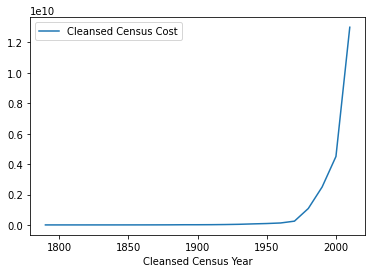

In [57]:
df.plot( x = 'Cleansed Census Year', y = 'Cleansed Census Cost')

9. Use Pandas built-in plotting function to plot the scatter plot of Total Population vs Total Cost.

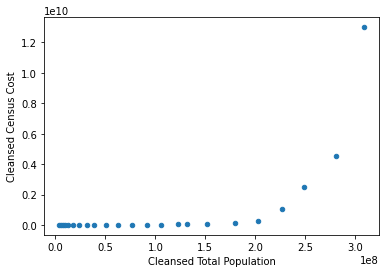

In [56]:
df.plot( x = 'Cleansed Total Population', y = 'Cleansed Census Cost',   kind= "scatter")